# Homework 1
###### by Mher Movsisyan
---

### 1 Conception questions  
Please provide a brief answer to each question
- What’s the main difference between supervised and unsupervised learning?

Answer:  
In supervised learning, the models receive labels, in unsupervised learning this is not the case.

- Will different initializations for k-means lead to different results?

Answer:  


Yes

- Give a short proof (can be in words but using correct logic) why k-means algorithm will converge in finite number of iterations.

Answer:  
Since there are a finite number of data points, there are a finite number of ways they can be arranged in clusters. Additionally, since we always take a step if it results in a lower objective value, we can only improve and we won't oscillate.

- What is he main difference between k-means and generalized k-means algorithm

Answer:  
k-means assumes euclidian distance, while the generalized version let's you use any distance metric that is valid through the triangle inequality. 

- Consider the following simple graph  
$$
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$

Write down the graph Laplacian matrix and find the eigenvectors associated with the zero eigenvalue. Explain how do you find out the number of disconnected clusters in graph and identify these disconnected clusters using these eigenvectors.

Answer:  
$$ 
L = \begin{bmatrix}
2 & -1 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
-1 & -1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
$$  

$$ \text{Subtracting a (scalar * Identity)} $$
$$ \downarrow $$

$$ 
\begin{bmatrix}
2 - \lambda & -1 & -1 & 0 & 0 \\
-1 & 2 - \lambda & -1 & 0 & 0 \\
-1 & -1 & 2 - \lambda & 0 & 0 \\
0 & 0 & 0 & 1 - \lambda & -1 \\
0 & 0 & 0 & -1 & 1 - \lambda
\end{bmatrix}
$$  



$$ \begin{align*}det(L - (\lambda I)) &= 0 = \\
&= (1 - \lambda)\begin{vmatrix}
2 - \lambda & -1 & -1 & 0 \\
-1 & 2 - \lambda & -1 & 0 \\
-1 & -1 & 2 - \lambda & 0 \\
0 & 0 & 0 & 1 - \lambda
\end{vmatrix} +  \begin{vmatrix}
2 - \lambda & -1 & -1 & 0 \\
-1 & 2 - \lambda & -1 & 0 \\
-1 & -1 & 2 - \lambda & 0 \\
0 & 0 & 0 & -1 
\end{vmatrix} \\
&= (1 - \lambda)((1 - \lambda)\begin{vmatrix}
2 - \lambda & -1 & -1 \\
-1 & 2 - \lambda & -1 \\
-1 & -1 & 2 - \lambda \\
\end{vmatrix}) - \begin{vmatrix}
2 - \lambda & -1 & -1 \\
-1 & 2 - \lambda & -1 \\
-1 & -1 & 2 - \lambda 
\end{vmatrix} \\
&= (1 - \lambda)(1 - \lambda)((2 - \lambda)^3 - 1 - 1 - 3(2 - \lambda)) - ((2 - \lambda)^3 - 1 - 1 - 3(2 - \lambda)) \\
&= ((1 - \lambda)(1 - \lambda) - 1)((2 - \lambda)^3 - 1 - 1 - 3(2 - \lambda)) \\
&= (- 2\lambda + \lambda^2)(-\lambda^3 + 6\lambda^2 -9\lambda) \\
&= \lambda(\lambda - 2)(\lambda - 3)(\lambda - 3)\lambda
\end{align*} $$

$$ \lambda = 1;\ \ \ \ \lambda = 2;\ \ \ \ \lambda = 0; $$

- $ \lambda = 0 $  
$$ \begin{bmatrix}
2 & -1 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
-1 & -1 & 2 & 0 & 0 \\
0 & 0 & 0 & 1 & -1  \\
0 & 0 & 0 & -1 & 1 
\end{bmatrix}
$$

$$ x_4 = x_5 $$
$$ \begin{bmatrix}
2 & -1 & -1 \\
-1 & 2 & -1 \\
-1 & -1 & 2 \\
\end{bmatrix} \overset{R_2 * 2; \ \ \ \ R_3 * 2}{\rightarrow} 
\begin{bmatrix}
2 & -1 & -1 \\
-2 & 4 & -2 \\
-2 & -2 & 4 \\
\end{bmatrix} \overset{R_2 + R_1;\ \ \ \ R_3 + R_1}{\rightarrow} 
\begin{bmatrix}
2 & -1 & -1 \\
0 & 3 & -3 \\
0 & -3 & 3 \\
\end{bmatrix}
$$

$$ x_1 = 2x_2; x_2 = x_3 $$

$$ E_{\lambda=0} = \left\{ \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \\
x_5 \end{bmatrix} = a\begin{bmatrix} 2 \\ 1 \\ 1 \\ 0 \\
0 \end{bmatrix} + b\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \\
1 \end{bmatrix} \right\} $$

We see two disconnected graphs because the eigenvector of $ \lambda = 0 $ can be expressed through two coordinates (`a` and `b`).

### 2: Image compression using clustering  

In this programming assignment, you are going to apply clustering algorithms for image compression. Your task is implementing K-means for this purpose. It is required you implementing the algorithms yourself rather than calling k-means from a package. However, it is ok to use standard packages such as file i/o, linear algebra, and visualization.

##### Formatting instruction

Input  
- `pixels`: the input image representation. Each row contains one data point (pixel). For image dataset, it contains 3 columns, each column corresponding to Red, Green, and Blue component. Each component has an integer value between 0 and 255.  
- `k`: the number of desired clusters. Too high value of K may result in empty cluster error. Then, you need to reduce it.  

Output  
- `class`: cluster assignment of each data point in pixels. The assignment should be 1, 2, 3, etc. For k = 5, for example, each cell of class should be either 1, 2, 3, 4, or 5. The output should be a column vector with size(pixels, 1) elements.
- `centroid`: location of k centroids (or representatives) in your result. With images, each centroid corresponds to the representative color of each cluster. The output should be a matrix with K rows and 3 columns. The range of values should be [0, 255], possibly floating point numbers

Answer:  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

seed = 173

def distance_euclidian(x, y):
    return np.sqrt(np.sum(np.square(x - y), axis=1))

def distance_manhattan(x, y):
    return np.sum(np.absolute(x - y), axis=1)


def k_means(pixels, k, seed=seed, distance=distance_euclidian):
    """Input  
    `pixels`: the input image representation. Each row contains one data point (pixel). 
        For image dataset, it contains 3 columns, each column corresponding to Red, 
        Green, and Blue component. Each component has an integer value between 0 and 255.  
    `k`: the number of desired clusters. Too high value of K may result in empty cluster 
        error. Then, you need to reduce it.  
    `seed`: random seed to feed to the pseudo-random number generator.  

    Output  
    `classes`: cluster assignment of each data point in pixels. The assignment should be 
        1, 2, 3, etc. For k = 5, for example, each cell of class should be either 1, 
        2, 3, 4, or 5. The output should be a column vector with size(pixels, 1) elements.
    `centroids`: location of k centroids (or representatives) in your result. With images, 
        each centroid corresponds to the representative color of each cluster. The output 
        should be a matrix with K rows and 3 columns. The range of values should be 
        [0, 255], possibly floating point numbers"""
        
    assert k <= 25500, "Too high of a `k`. Try with less clusters"
    assert pixels.shape[1] == 3, "Columns must represent the RGB schema"
    np.random.seed(seed)
    finished = False
    
    # First iteration, generate random cluster centers
    centroids = np.random.randint(low=0, high=255, size=(k, 3), dtype="int")
    classes = np.zeros((pixels.shape[0],), dtype="int") # to clarify scope
    
    # Memory-intensive but fast assuming k << n
    i = 0
    while not finished:
        i += 1
        distances = np.zeros((pixels.shape[0], k), dtype="int")
        
        # calculating distances
        for cluster in range(k):
            dist = distance(pixels, centroids[cluster])
            distances[:, cluster] = dist
            
        # assigning clusters
        classes = np.argmin(distances, axis=1)
        
        old_centroids = centroids.copy()
        # calculate new cluster centers
        for cluster in range(k):
            cluster_points = classes == cluster
            centroids[cluster] = np.mean(pixels[cluster_points], axis=0)
            
        # check if clusters didn't change
        if (old_centroids == centroids).all():
            finished = True
            print(f"Converged in {i} iterations")
    
    return classes, centroids

k_means(np.random.randint(0, 255, (10000, 3)), 5)[1]

Converged in 56 iterations


array([[183,  63, 186],
       [ 67, 181,  64],
       [ 53, 113, 185],
       [147,  63,  55],
       [189, 198, 141]])

#### Hand-in  
Both of your code and report will be evaluated. Upload them together as a zip file. In your report, answer to the following questions:  
1. Use k-means with squared-$ l_2 $ norm as a metric, for `GeorgiaTech.bmp` and `football.bmp` and also choose a third picture of your own to work on. We recommend size of 320 × 240 or smaller. Run your k-means implementation with these pictures, with several different k = 2, 4, 8, 16. Run your k-means implementation (with squared-$ l_2 $ norm) with random initialization centroids. Please try multiple time and report the best one (in terms of the image quality). Please write in your report, how long does it take to converge for each k (report the number of iterations) and also include the resulted compressed pictures for each k.  

Answer:  
Here are the original images:  
<img src="data/GeorgiaTech.bmp" width=250/> <img src="data/football.bmp" width=250/> <img src="data/biz_card.bmp" width=250/>

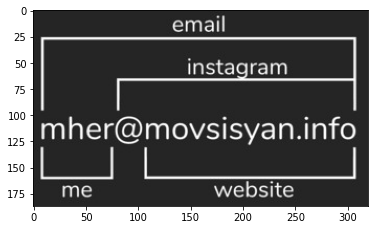

In [10]:
from PIL import Image

inputs = [np.array(Image.open(f'data\{i}')) for i in ["GeorgiaTech.bmp", "football.bmp", "biz_card.jpg"]]
inputs[2] = np.repeat(inputs[2][:, :, np.newaxis], 3, axis=2)
plt.imshow(inputs[2], cmap="gray");

Running 2-means
Converged in 10 iterations


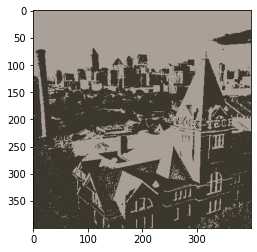

Converged in 8 iterations


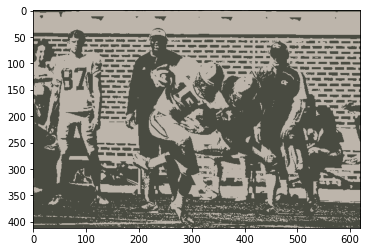

Converged in 4 iterations


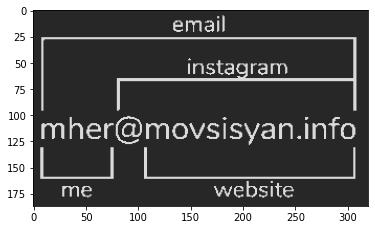

Running 4-means
Converged in 7 iterations


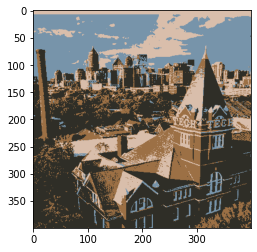

Converged in 13 iterations


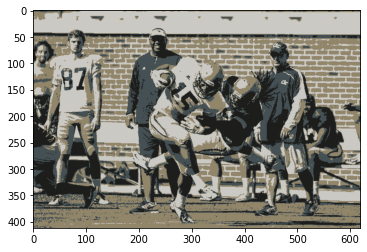

Converged in 4 iterations


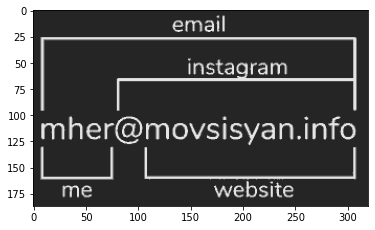

Running 8-means
Converged in 61 iterations


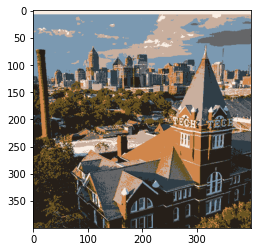

Converged in 33 iterations


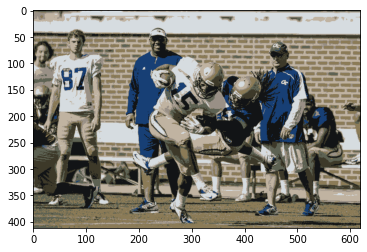

Converged in 7 iterations


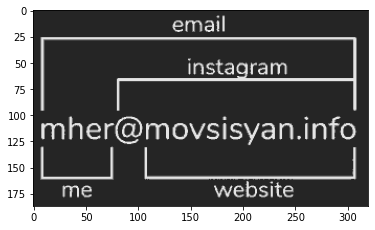

Running 16-means
Converged in 100 iterations


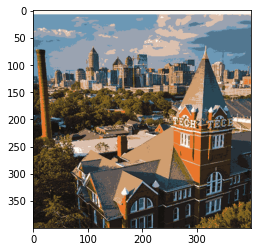

Converged in 50 iterations


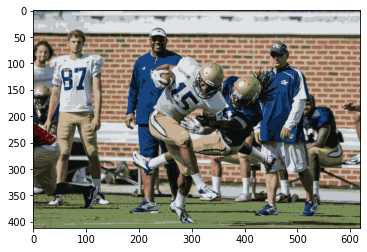

Converged in 6 iterations


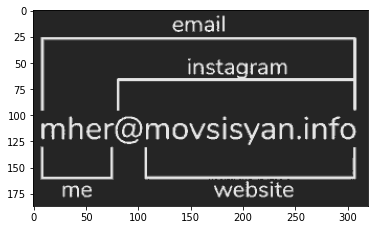

In [14]:
from time import sleep
for k in [2, 4, 8, 16]:
    print(f"Running {k}-means")
    for image in inputs:
        original_shape = image.shape
        classes, centroids = k_means(np.reshape(image, (-1, 3)), k)
        reconstructed_image = np.reshape(np.array([centroids[c] for c in classes]), (original_shape))
        plt.imshow(reconstructed_image)
        plt.show()
        sleep(1)

2. Now try your k-means with the Manhattan distance (or $ l_1 $ distance) and repeat the same steps in Part (1). Please note that the assignment of data point should be based on the Manhattan distance, and the cluster centroid (by minimizing the sum of deviance – as a result o fusing the Manhattan distance) will be taken as the “median” of each cluster. Comment on the difference of image compression results using the two methods.

Running 2-means
Converged in 7 iterations


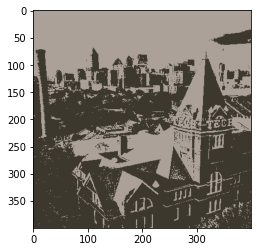

Converged in 9 iterations


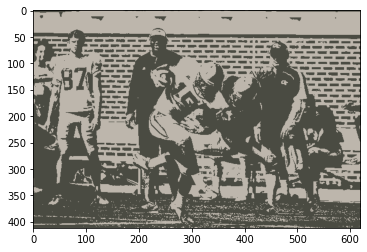

Converged in 4 iterations


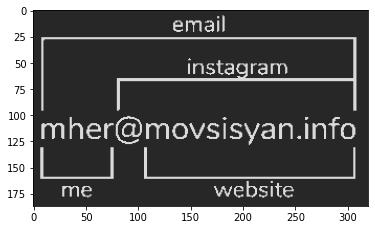

Running 4-means
Converged in 8 iterations


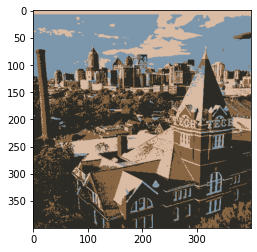

Converged in 13 iterations


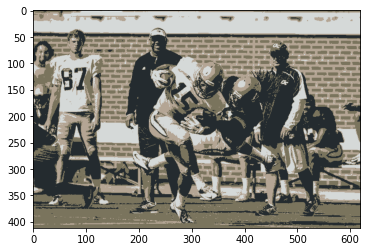

C:\Users\zolobrine\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\zolobrine\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Converged in 7 iterations


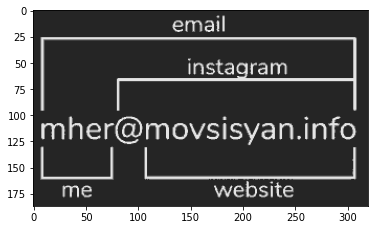

Running 8-means
Converged in 19 iterations


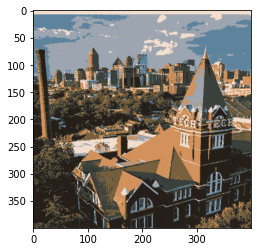

Converged in 30 iterations


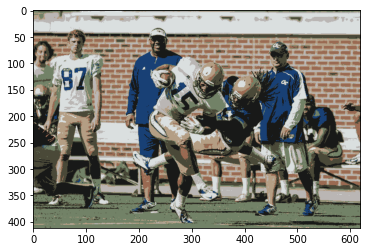

Converged in 7 iterations


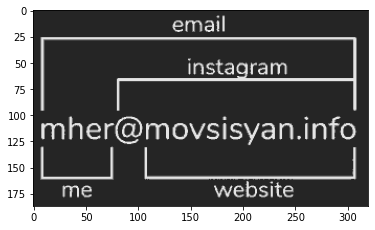

Running 16-means
Converged in 30 iterations


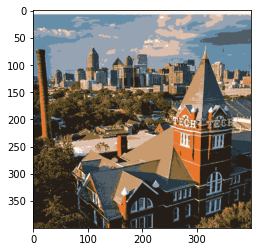

Converged in 40 iterations


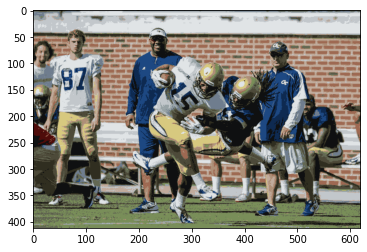

Converged in 8 iterations


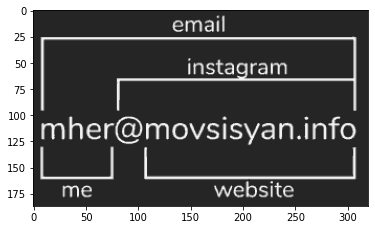

In [15]:
from time import sleep
for k in [2, 4, 8, 16]:
    print(f"Running {k}-means")
    for image in inputs:
        original_shape = image.shape
        classes, centroids = k_means(np.reshape(image, (-1, 3)), k, distance=distance_manhattan)
        reconstructed_image = np.reshape(np.array([centroids[c] for c in classes]), (original_shape))
        plt.imshow(reconstructed_image)
        plt.show()
        sleep(1)

#### Note  
- You may see some error message about empty clusters when you use too large k. Your implementation should treat this exception as well. That is, do not terminate even if you have an empty cluster, but use smaller number of clusters in that case.  
- We recommend you to test your code with several different pictures so that you can detect some problems that might happen occasionally.  
- If we detect copy from any other student’s code or from the web, you will not be eligible for any credit for the entire homework, not just for the programming part. Also, directly calling built-in functions or from other package functions is not allowed.  

### 3 Political blogs dataset  
We will study a political blogs dataset first compiled for the paper Lada A. Adamic and Natalie Glance,
“The political blogosphere and the 2004 US Election”, in Proceedings of the WWW-2005 Workshop on the
Weblogging Ecosystem (2005). It is assumed that blog-site with the same political orientation are more
likely to link to each other, thus, forming a “community” or “cluster” in a graph. In this question, we will
see whether or not this hypothesis is likely to be true based on data.  

- The dataset `nodes.txt` contains a graph with $ n = 1490 $ vertices (“nodes”) corresponding to political blogs.  
- The dataset `edges.txt` contains edges between the vertices. You may remove isolated nodes (nodes that are not connected any other nodes) in the pre-processing.  

We will treat the network as an undirected graph; thus, when constructing the adjacency matrix, make
it symmetrical by, e.g., set the entry in the adjacency matrix to be one whether there is an edge between
the two nodes (in either direction).  
In addition, each vertex has a 0-1 label (in the 3rd column of the data file) corresponding to the true
political orientation of that blog. We will consider this as the true label and check whether spectral clustering
will cluster nodes with the same political orientation as possible.

1. Use spectral clustering to find the k = 2, 5, 10, 20 clusters in the network of political blogs (each node is a blog, and their edges are defined in the file `edges.txt`). Find majority labels in each cluster, for different k values, respectively. For example, if there are k = 2 clusters, and their labels are {0, 1, 1, 1} and {0, 0, 1} then the majority label for the first cluster is 1 and for the second cluster is 0. **It is required you implementing the algorithms yourself rather than calling from a package**. Now compare the majority label with the individual labels in each cluster, and report the mismatch rate for each cluster, when k = 2, 5, 10, 20. For instance, in the example above, the mismatch rate for the first cluster is 1/4 (only the first node differs from the majority) and the the second cluster is 1/3.

Answer:  

In [35]:
adj_mat = np.zeros((1490, 1490))

import pandas as pd

(nodes_df := pd.read_csv("data/nodes.txt", sep="\t", header=None).rename(columns=(lambda x: ["id", "site", "label", "cat"][x])))

,id,site,label,cat
0,1,100monkeystyping.com,0,Blogarama
1,2,12thharmonic.com/wordpress,0,BlogCatalog
2,3,40ozblog.blogspot.com,0,"Blogarama,BlogCatalog"
3,4,4lina.tblog.com,0,Blogarama
4,5,750volts.blogspot.com,0,Blogarama
...,...,...,...,...
1485,1486,youngconservative.blogspot.com,1,Blogarama
1486,1487,zebrax.blogs.com,1,BlogCatalog
1487,1488,zeke01.blogspot.com,1,"Blogarama,BlogCatalog"
1488,1489,zeke01.typepad.com,1,Blogarama


In [36]:
(edges := pd.read_csv("data/edges.txt", sep="\t", header=None).rename(columns=(lambda x: ["node1", "node2"][x])))

,node1,node2
0,267,1394
1,267,483
2,267,1051
3,904,1479
4,904,919
...,...,...
19085,1133,1390
19086,1133,1429
19087,1133,1423
19088,1133,1408


In [37]:
for i, n1, n2 in edges.itertuples():
    adj_mat[n1-1, n2-1] = 1
    adj_mat[n2-1, n1-1] = 1
adj_mat

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
eigvals, eigvecs = np.linalg.eig(adj_mat)
eigvals.shape, eigvecs.shape

((1490,), (1490, 1490))

In [49]:
(classed := eigvecs[eigvals == 0][-1] == 0)

array([False, False, False, ...,  True,  True,  True])

In [51]:
# accuracy
np.sum(classed == nodes_df.label)/1490

0.687248322147651

I don't get how we can have higher `k` and compare it for this data, because the label only has 0s and 1s. I will just assign each cluster to the majority label.

In [104]:
for k in [2, 5, 10, 20]:
    print(f"Taking k={k}")
    # getting cluster from eigs
    assignments = []
    for k_i in range(k - 1):
        classed = ~(eigvecs[eigvals == 0][-(k_i + 1)] == 0)
        assignments.append(classed)

    # label-encoding the cluster vectors
    pred_labels = []
    for i in range(len(assignments[0])):
        pred_label = sum([(assignments[k_i][i]) * 2**k_i for k_i in range(len(assignments))])
        pred_labels.append(pred_label)
        
    # assiging a majority label to each cluster
    nodes_df["pred"] = pred_labels
    vc = nodes_df.groupby("pred").label.value_counts()

    mapping = {}
    for k_i, label in vc.index:
        if k_i not in mapping.keys():
            mapping[k_i] = label
        
    nodes_df["pred_class"] = nodes_df.pred.apply(lambda x: mapping[x])
    print(f'Accuracy {sum(nodes_df["pred_class"] == nodes_df["label"])/len(nodes_df)}')

Taking k=2
Accuracy 0.687248322147651
Taking k=5
Accuracy 0.687248322147651
Taking k=10
Accuracy 0.687248322147651
Taking k=20
Accuracy 0.687248322147651


2. Tune your k and find the number of clusters to achieve a reasonably small mismatch rate. Please explain how you tune k and what is the achieved mismatch rate. Please explain intuitively what this results tells about the network community structure.

In [106]:
for k in [22, 40, 100, 250]:
    print(f"Taking k={k}")
    # getting cluster from eigs
    assignments = []
    for k_i in range(k - 1):
        classed = ~(eigvecs[eigvals == 0][-(k_i + 1)] == 0)
        assignments.append(classed)

    # label-encoding the cluster vectors
    pred_labels = []
    for i in range(len(assignments[0])):
        pred_label = sum([(assignments[k_i][i]) * 2**k_i for k_i in range(len(assignments))])
        pred_labels.append(pred_label)
        
    # assiging a majority label to each cluster
    nodes_df["pred"] = pred_labels
    vc = nodes_df.groupby("pred").label.value_counts()

    mapping = {}
    for k_i, label in vc.index:
        if k_i not in mapping.keys():
            mapping[k_i] = label
        
    nodes_df["pred_class"] = nodes_df.pred.apply(lambda x: mapping[x])
    print(f'Accuracy {sum(nodes_df["pred_class"] == nodes_df["label"])/len(nodes_df)}')

Taking k=22
Accuracy 0.687248322147651
Taking k=40
Accuracy 0.687248322147651
Taking k=100
Accuracy 0.687248322147651
Taking k=250
Accuracy 0.687248322147651


I probably did something wrong :D